### Data Processing:

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
df = pd.read_csv("animes.csv")

df['members'] = df['members'].astype(int)
df['popularity'] = df['popularity'].astype(int)
df['genre'] = df['genre'].apply(eval)
df = df.drop('img_url', axis=1)
df = df.drop('link', axis=1)
df['aired'] = df['aired'].str.split(' to ').str[0]
display(df)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"[Comedy, Sports, Drama, School, Shounen]","Oct 4, 2015",25.0,489888,141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"[Drama, Music, Romance, School, Shounen]","Oct 10, 2014",22.0,995473,28,24.0,8.83
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"[Sci-Fi, Adventure, Mystery, Drama, Fantasy]","Jul 7, 2017",13.0,581663,98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","[Action, Military, Adventure, Comedy, Drama, M...","Apr 5, 2009",64.0,1615084,4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"[Action, Mystery, Supernatural, Vampire]","Jan 6, 2017",1.0,214621,502,22.0,8.83
...,...,...,...,...,...,...,...,...,...,...
19306,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"[Sci-Fi, Adventure, Comedy, Magic]","Oct 6, 2016",13.0,134252,843,1070.0,7.73
19307,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","[Adventure, Fantasy, Magic, Martial Arts, Come...","Apr 6, 1995",52.0,84407,1292,1071.0,7.73
19308,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","[Mystery, Horror, Supernatural]","Oct 22, 2000",19.0,83093,1314,1073.0,7.73
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"[Action, Adventure, Comedy, Historical, Demons...","Dec 21, 2002",1.0,71989,1469,1077.0,7.73


### Basic Data Exploration and Summary Statistics:

1. 
- Z-Test Hypothesis:
- HA: The mean score of Anime with "Action" genre will be greater or equal to 7  
- H0: The mean score of Anime with "Action" genre will be less than 7

Conclusion: because the graph is skewed, we can use the median as an indicator, and the median of every Action anime's score is 6.88 which is below 7. We also look at the p-value and since it is above 0.05, we fail to reject the null hypothesis. 

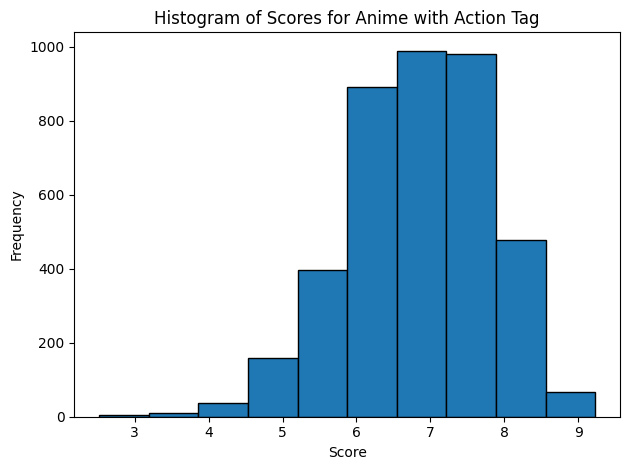

Median score of Action entries: 6.88
Estimated p-value (One-tailed test): 0.4338310394841889
The result is not statistically significant (fail to reject null hypothesis).


In [79]:
action_entries = df[df['genre'].apply(lambda x: 'Action' in x)]
mean = action_entries['score'].mean()
std_dev = action_entries['score'].std()
plt.hist(action_entries['score'], bins=10, edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores for Anime with Action Tag')
plt.tight_layout()
plt.show()
median_score = action_entries['score'].median()
print("Median score of Action entries:", median_score)
score_value = 7
z_score = (score_value - mean) / std_dev
p_value = 1 - scipy.stats.norm.cdf(z_score)
print("Estimated p-value (One-tailed test):", p_value)
if p_value < 0.05:
    print("The result is statistically significant (reject null hypothesis).")
else:
    print("The result is not statistically significant (fail to reject null hypothesis).")


2. There are 96 lower outliers when it comes to score of anime and one higher outlier, suggesting that anime is generally well received as when there are outliers or bad anime, it is a noticable exception. 

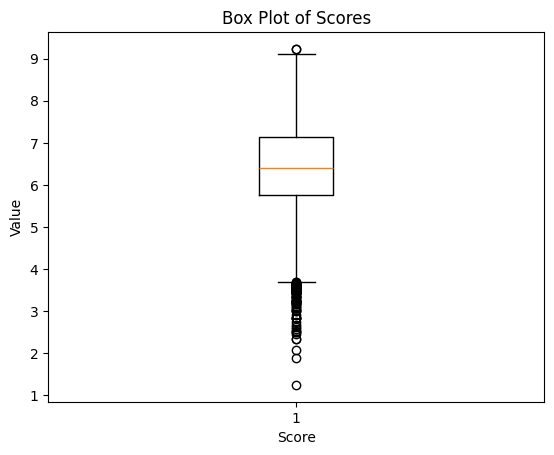

Number of lower outliers: 96


In [80]:
score_data = df['score'].dropna()
plt.boxplot(score_data)
plt.xlabel('Score')
plt.ylabel('Value')
plt.title('Box Plot of Scores')
plt.show()
q1 = score_data.quantile(0.25)
q3 = score_data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
lower_outliers = df[df['score'] < lower_bound].shape[0]
print(f"Number of lower outliers: {lower_outliers}")

3. The most common genre amongst the top 100 ranked animes is 'Drama' with 50 entries, followed by 'Action' tied for second with 46, and 'Comedy' and 'Shounen' being tied for third. 

{'Action': 46, 'Military': 10, 'Adventure': 26, 'Comedy': 44, 'Drama': 50, 'Magic': 2, 'Fantasy': 20, 'Shounen': 44, 'Thriller': 6, 'Sci-Fi': 34, 'Super Power': 10, 'Romance': 14, 'Supernatural': 28, 'School': 16, 'Mystery': 20, 'Historical': 30, 'Parody': 18, 'Samurai': 18, 'Space': 4, 'Game': 2, 'Seinen': 14, 'Slice of Life': 20, 'Sports': 8, 'Mecha': 6, 'Vampire': 6, 'Demons': 6, 'Music': 2, 'Josei': 2, 'Martial Arts': 2, 'Horror': 4, 'Police': 2, 'Psychological': 4, 'Shoujo': 4}


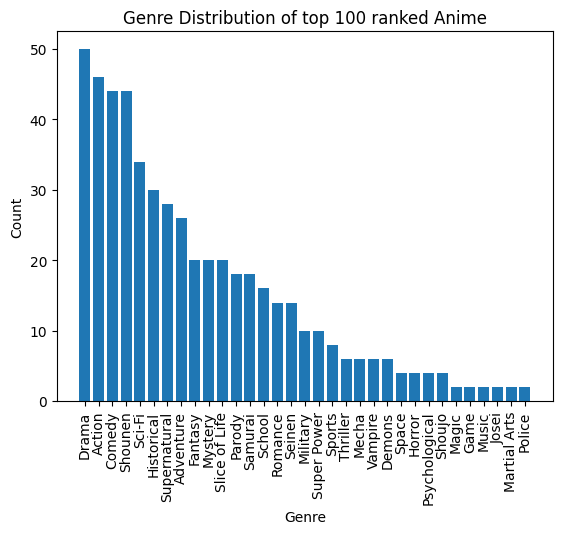

In [85]:
lowest_ranked = df.nsmallest(100, 'ranked')
def g(df):
   #df['genre'] = df['genre'].apply(eval)
   return df
df2 = g(lowest_ranked)
genre_counts = {}
def f(df):
  for genres in df['genre']:
    for genre in genres:
      if genre in genre_counts:
        genre_counts[genre] += 1
      else:
        genre_counts[genre] = 1
  return genre_counts
genre_counts = f(df2)
print(genre_counts)

sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
genre_names, genre_counts = zip(*sorted_genres)

# Create a bar chart
plt.bar(genre_names, genre_counts)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre Distribution of top 100 ranked Anime")
plt.xticks(rotation=90) 

plt.show()